In [1]:
# Download dataset (you can also use the file in the zip if you are offline)

! wget https://raw.githubusercontent.com/SK7here/Movie-Review-Sentiment-Analysis/master/IMDB-Dataset.csv

--2023-06-01 14:15:50--  https://raw.githubusercontent.com/SK7here/Movie-Review-Sentiment-Analysis/master/IMDB-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘IMDB-Dataset.csv’

IMDB-Dataset.csv    100%[===================>]  63.14M   219MB/s    in 0.3s    

2023-06-01 14:15:51 (219 MB/s) - ‘IMDB-Dataset.csv’ saved [66212309/66212309]



In [2]:
# Read dataset
import pandas as pd

f = open("IMDB-Dataset.csv")
data = pd.read_csv(f, nrows=30000)

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.tail()

,review,sentiment
29995,"New York, I Love You finally makes it to our s...",positive
29996,This movie makes you wish imdb would let you v...,negative
29997,"Space Camp, which had the unfortunate luck to ...",negative
29998,"Octavio Paz, Mexican poet, writer, and diploma...",positive
29999,Having watched 10 minutes of this movie I was ...,negative


In [5]:
data.shape
data.describe

<bound method NDFrame.describe of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
29995  New York, I Love You finally makes it to our s...  positive
29996  This movie makes you wish imdb would let you v...  negative
29997  Space Camp, which had the unfortunate luck to ...  negative
29998  Octavio Paz, Mexican poet, writer, and diploma...  positive
29999  Having watched 10 minutes of this movie I was ...  negative

[30000 rows x 2 columns]>

In [6]:
# Drop duplicate reviews

data = data.drop_duplicates(subset="review")
data.describe

<bound method NDFrame.describe of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
29995  New York, I Love You finally makes it to our s...  positive
29996  This movie makes you wish imdb would let you v...  negative
29997  Space Camp, which had the unfortunate luck to ...  negative
29998  Octavio Paz, Mexican poet, writer, and diploma...  positive
29999  Having watched 10 minutes of this movie I was ...  negative

[29854 rows x 2 columns]>

In [7]:
data.sentiment.value_counts()

positive    14979
negative    14875
Name: sentiment, dtype: int64

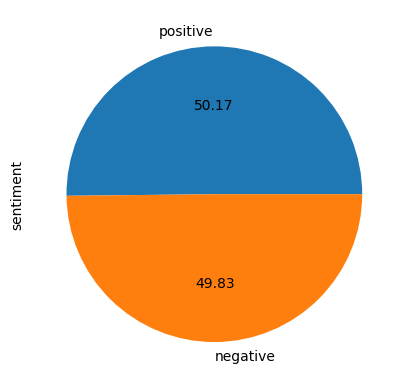

In [8]:
import matplotlib.pyplot as plt

data.sentiment.value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

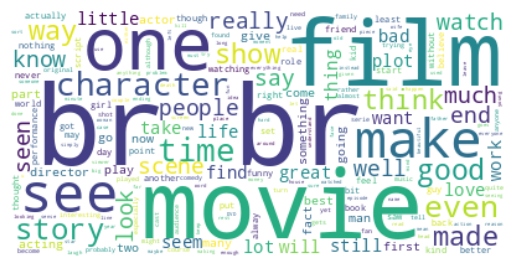

In [9]:
from wordcloud import WordCloud

review_text = ' '.join(data['review'].astype(str))
cloud_data = WordCloud(background_color="white").generate(review_text)
plt.imshow(cloud_data, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [10]:
from wordcloud import STOPWORDS

my_stopwords = set(STOPWORDS)
my_stopwords.update(["movie", "movies", "film", "films", "watch", "br"])

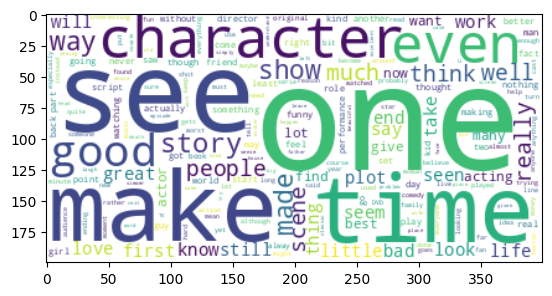

In [11]:
my_cloud = WordCloud(background_color = "white", stopwords=my_stopwords).generate(review_text)
plt.imshow(my_cloud, interpolation = "bilinear")

In [12]:
# Convert sentiment to numbers

label_to_int = {'negative':0,'positive':1}
int_to_label = {0:'negative',1:'positive'}

data['label'] = data.sentiment.map(label_to_int)

data.head()
data.tail()

<ipython-input-12-b67b0de760fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data.sentiment.map(label_to_int)


,review,sentiment,label
29995,"New York, I Love You finally makes it to our s...",positive,1
29996,This movie makes you wish imdb would let you v...,negative,0
29997,"Space Camp, which had the unfortunate luck to ...",negative,0
29998,"Octavio Paz, Mexican poet, writer, and diploma...",positive,1
29999,Having watched 10 minutes of this movie I was ...,negative,0


In [13]:
import nltk 
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

lemmatizer = nltk.stem.WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

def PreprocessReviews(text):
  #html tags:
  text = re.sub('<.*?>',' ',text)
  #special characters (punctuation) '@,!' e.t.c.
  text = re.sub('\W',' ',text)
  #single characters
  text = re.sub('\s+[a-zA-Z]\s+',' ', text)
  #multiple spaces with single space
  text = re.sub('\s+',' ', text)
  tokenized_text = nltk.word_tokenize(text)
  clean_text = [word for word in tokenized_text if word not in my_stopwords]
  return clean_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
test_review = "Wow! THIS is the best movie I have ever seen !!!!"

PreprocessReviews(test_review)

['Wow', 'THIS', 'best', 'seen']

In [16]:
# Preprocess reviews

data.loc[:, "review"] = data["review"].apply(lambda x: PreprocessReviews(x))

<ipython-input-16-0b57269de9d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "review"] = data["review"].apply(lambda x: PreprocessReviews(x))


In [17]:
data.head()

,review,sentiment,label
0,"[One, reviewers, mentioned, watching, 1, Oz, e...",positive,1
1,"[A, wonderful, little, production, The, filmin...",positive,1
2,"[I, thought, wonderful, way, spend, time, hot,...",positive,1
3,"[Basically, family, little, boy, Jake, thinks,...",negative,0
4,"[Petter, Mattei, Love, Time, Money, visually, ...",positive,1


In [18]:
# Train-test split

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data['review'],data['sentiment'])

print("Total Data: {}".format(data.shape[0]))
print("Training Data: {}".format(X_train.shape[0]))
print("Test Data: {}".format(X_test.shape[0]))

Total Data: 29854
Training Data: 22390
Test Data: 7464


In [19]:
y_train[:10]

2311     positive
384      negative
11872    negative
25332    positive
20396    positive
23745    positive
27017    negative
1807     negative
20007    negative
24823    negative
Name: sentiment, dtype: object

In [20]:
# Create TF-IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer=lambda x: x, ngram_range=(1, 2))

In [21]:
# Transform training data

tfidf_train = tfidf_vectorizer.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


In [22]:
print('vocabulary size: {}'.format(len(tfidf_vectorizer.get_feature_names_out())))
vocabulary = tfidf_vectorizer.get_feature_names_out() 
print(vocabulary[15000:15100])

vocabulary size: 91736
['Firstenberg' 'Firstly' 'Firstmans' 'Firth' 'Fisburn' 'Fischer' 'Fish'
 'Fishback' 'Fishbourne' 'Fishburn' 'Fishburne' 'Fisher' 'Fisheris'
 'Fishmen' 'Fisk' 'Fissy' 'Fist' 'Fistful' 'Fists' 'Fistsof' 'Fit' 'Fitch'
 'Fitfully' 'Fittingly' 'Fitz' 'Fitzgerald' 'Fitzpatrick' 'Fitzs' 'Fiume'
 'Five' 'Fix' 'Fixer' 'Fixit' 'Fiza' 'Fizz' 'Fizzy' 'Fjaestad' 'Fl'
 'Flabbergasted' 'Flack' 'Flag' 'Flagg' 'Flags' 'Flagstaff' 'Flaherty'
 'Flair' 'Flairty' 'Flak' 'Flam' 'Flambeau' 'Flamberg' 'Flambeur' 'Flame'
 'Flamenco' 'Flamethrowers' 'Flaming' 'Flamingo' 'Flamingos' 'Flanagan'
 'Flanders' 'Flane' 'Flange' 'Flanigan' 'Flannel' 'Flanner' 'Flannery'
 'Flapjack' 'Flaps' 'Flares' 'Flash' 'Flashback' 'Flashbacks' 'Flashdance'
 'Flashdancers' 'Flashes' 'Flashing' 'Flashlights' 'Flashman' 'Flashpoint'
 'Flashy' 'Flat' 'Flatiron' 'Flatlets' 'Flatley' 'Flatliners' 'Flatly'
 'Flatman' 'Flatop' 'Flats' 'Flatson' 'Flattop' 'Flaubert' 'Flav' 'Flavia'
 'Flaviana' 'Flavin' 'Flavius' 'Flav

In [23]:
import numpy as np
np.set_printoptions(threshold=np.inf) 
doc_1 = tfidf_train.toarray()[0]
print(doc_1)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05489844
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [24]:
vocab_indices = []

for i in range(len(doc_1)):
  if doc_1[i] != 0:  
    vocab_indices.append(i)

for index in vocab_indices:
  print(tfidf_vectorizer.get_feature_names_out()[index])

100
1999
And
Angelo
Badalamenti
Betty
By
David
Dr
Elena
For
Gilda
Harring
Having
He
Hollywood
Internet
Is
It
Justin
Laura
Lynch
Mulholland
Naomi
Originally
Rita
She
So
TV
The
Theroux
Watts
Well
You
absolute
acting
apartment
article
auditions
aunt
bathroom
become
bizarre
blonde
brilliant
captured
characters
closely
clue
clues
come
completely
confusing
created
decides
definition
delivers
depends
directing
director
discover
doesn
dream
enigmatic
excellent
extremely
facing
fans
filmed
filmmaker
finds
finest
good
greatest
hah
help
indescribable
known
left
ll
local
lost
love
made
main
make
making
many
masterful
masterfully
masterpiece
memory
minute
mob
money
music
name
need
new
next
nightmarish
now
one
parts
patient
perfect
perky
pick
pilot
point
pointing
poster
probably
problems
read
really
received
rejected
scenes
scores
second
see
sense
set
shown
staying
suitable
takes
terrific
theaters
things
throughout
time
true
two
type
understand
ve
view
watched
watching
weird
will
work
year


In [25]:
# Transform test data

tfidf_test = tfidf_vectorizer.transform(X_test)

In [26]:
test_1 = tfidf_test.toarray()[0]
test_indices = []

for i in range(len(test_1)):
  if test_1[i] != 0:  
    test_indices.append(i)

for index in test_indices:
  print(tfidf_vectorizer.get_feature_names_out()[index])

However
If
Report
Starr
TV
That
The
adequately
became
boring
breasts
copes
done
explored
fixated
found
girl
grows
instances
interest
latest
lost
maturity
news
poverty
set
show
soon
sophistication
subject
switched
us
ve
young


In [27]:
# Create Naive Bayes classifier

from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(tfidf_train, y_train)

MultinomialNB()

In [28]:
# Make predictions

predictions = naive_bayes.predict(tfidf_test)

In [29]:
len(predictions)

7464

In [30]:
# Evaluate model performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions,)))
print('Precision score: ', format(precision_score(y_test, predictions, average="weighted")))
print('Recall score: ', format(recall_score(y_test, predictions, average="weighted")))
print('F1 score: ', format(f1_score(y_test, predictions, average="weighted")))

Accuracy score:  0.8735262593783494
Precision score:  0.8735710008700481
Recall score:  0.8735262593783494
F1 score:  0.8735182674853749


In [33]:
# Example usage

sample_review = [PreprocessReviews("It is a good movie")]

sample_review_processed = tfidf_vectorizer.transform(sample_review)
prediction = naive_bayes.predict(sample_review_processed)
print("The sentiment of the review is:", prediction[0])

The sentiment of the review is: positive
